In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import ffmpeg
import operator
from moviepy.editor import *


In [2]:
targetSampleRate = 11025
#stream = ffmpeg.input
audioclip1 = AudioFileClip("video/stoopid1.MOV", fps=targetSampleRate)
audioclip2 = AudioFileClip("video/stoopid2.MOV", fps=targetSampleRate)
sr1 = audioclip1.fps
sr2 = audioclip2.fps
soundarray1 = audioclip1.to_soundarray()
soundarray2 = audioclip2.to_soundarray()
x1 = [item[0] for item in soundarray1]
x2 = [item[0] for item in soundarray2]

#in seconds
MARGIN = 10
x1_snip = x1[:MARGIN * sr1]
x2_snip = x2[:MARGIN * sr2]

In [3]:
print('Time of track1 in seconds: ' + str(len(x1)/sr1))
print('Time of track2 in seconds: ' + str(len(x2)/sr2))
if sr1 == sr2:
    print('OK to proceed, sample rates are: ' + str(sr1))
else:
    print('Error, sample rates dont match')

Time of track1 in seconds: 31
Time of track2 in seconds: 25
OK to proceed, sample rates are: 11025


In [4]:
def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    """
    correlated_array = np.correlate(array1, array2, 'full')
    end_index = len(array1)
    st_index = -len(array2) + 1
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

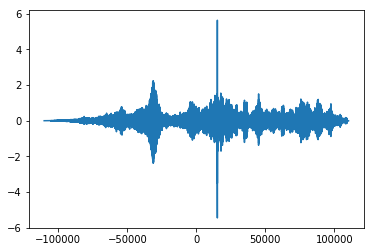

In [5]:
(offsets, corr) = array_correlation(x1_snip, x2_snip)
plt.plot(offsets, corr)

Offset is 1.38113378685 seconds


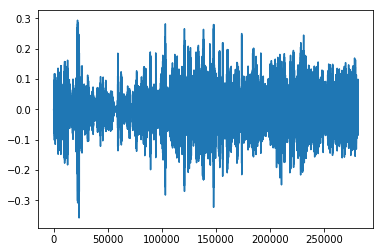

In [14]:
offset = offsets[np.argmax(corr)]
print("Offset is {} seconds".format(1.0 * offset / sr1))

x1_crop = x1
x2_crop = x2
if offset > 0:
    x1_crop = x1[offset:]
else:
    x2_crop = x2[-offset:]
if len(x1_crop) < len(x2_crop):
    x2_crop = x2_crop[:len(x1_crop)]
else:
    x1_crop = x1_crop[:len(x2_crop)]

totalAudio = list(map(operator.add, x1_crop, x2_crop))
plt.plot(totalAudio)
ipd.Audio(totalAudio, rate=sr1)

143.5546875


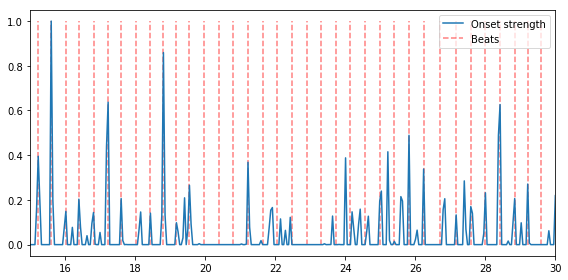

In [15]:
#plotting the tempo/beats of song
x11 = np.array(x1)
tempo, beats = librosa.beat.beat_track(y=x11, sr=sr1)

onset_env = librosa.onset.onset_strength(x11, sr=sr1, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr1)

hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr1, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

print(tempo)